# Stack Overflow Survey Data Analysis
Stack Overflow is the premier online community for developers, offering a platform to learn, share expertise, and advance careers. Every month, over 50 million professional and aspiring programmers visit Stack Overflow to troubleshoot coding issues, enhance skills, and explore job prospects. Collaborating with businesses, Stack Overflow assists in comprehending, hiring, engaging, and empowering developers globally. Their offerings encompass developer marketing, technical recruitment, market research, and enterprise knowledge sharing. Explore their business solutions further for additional insights.

Each year since 2011, Stack Overflow asked the developer community about everything from their favorite technologies to their job preferences. In the year 2020, this survey focused on being more representative of the diversity of programmers worldwide and it was taken by approximately 65,000 people. I will be performing a complete exploratory data analysis on this dataset.



## 1.0 Goals

-Comprehensive exploratory data analysis of the Stack Overflow dataset

-Use visualization tools to bring out insights

## 2.0 Import Libraries 

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 3.0 Upload and explore datset

In [6]:
df = pd.read_csv('survey_results_public.csv')
pd.set_option('display.max_columns', 1000)
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

In [7]:
df.shape

(65437, 114)

### Extract the data we need 
Many columns with multiple survey responses in individual cells. Remove unnecessary columns and slit data in cells that contain miltiple answers. 

In [9]:
df.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

In [10]:
df.info(verbose =True, show_counts = True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 114 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    ResponseId                      65437 non-null  int64  
 1    MainBranch                      65437 non-null  object 
 2    Age                             65437 non-null  object 
 3    Employment                      65437 non-null  object 
 4    RemoteWork                      54806 non-null  object 
 5    Check                           65437 non-null  object 
 6    CodingActivities                54466 non-null  object 
 7    EdLevel                         60784 non-null  object 
 8    LearnCode                       60488 non-null  object 
 9    LearnCodeOnline                 49237 non-null  object 
 10   TechDoc                         40897 non-null  object 
 11   YearsCode                       59869 non-null  object 
 12   YearsCodePro    

In [11]:
df1 = df[['MainBranch', 'Age', 'Employment', 'EdLevel', 'DevType', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith',
                  'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'AISearchDevHaveWorkedWith', 'AISearchDevWantToWorkWith',
                  'AISearchDevAdmired', 'ConvertedCompYearly']]
df1.head()

,MainBranch,Age,Employment,EdLevel,DevType,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,ConvertedCompYearly
0,I am a developer by profession,Under 18 years old,"Employed, full-time",Primary/elementary school,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,I am a developer by profession,35-44 years old,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack",United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,NaN,NaN,NaN,NaN
2,I am a developer by profession,45-54 years old,"Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Developer Experience,United Kingdom of Great Britain and Northern I...,NaN,NaN,C#,C#,C#,Firebase Realtime Database,Firebase Realtime Database,Firebase Realtime Database,Google Cloud,Google Cloud,Google Cloud,NaN,NaN,NaN,NaN
3,I am learning to code,18-24 years old,"Student, full-time",Some college/university study without earning ...,"Developer, full-stack",Canada,NaN,NaN,C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...,HTML/CSS;Java;JavaScript;PowerShell;Python;SQL...,HTML/CSS;Java;JavaScript;PowerShell;Python;SQL...,MongoDB;MySQL;PostgreSQL;SQLite,MongoDB;MySQL;PostgreSQL,MongoDB;MySQL;PostgreSQL,Amazon Web Services (AWS);Fly.io;Heroku,Amazon Web Services (AWS);Vercel,Amazon Web Services (AWS),NaN,NaN,NaN,NaN
4,I am a developer by profession,18-24 years old,"Student, full-time","Secondary school (e.g. American high school, G...","Developer, full-stack",Norway,NaN,NaN,C++;HTML/CSS;JavaScript;Lua;Python;Rust,C++;HTML/CSS;JavaScript;Lua;Python,C++;HTML/CSS;JavaScript;Lua;Python,PostgreSQL;SQLite,PostgreSQL;SQLite,PostgreSQL;SQLite,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Clean Data 

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MainBranch                 65437 non-null  object 
 1   Age                        65437 non-null  object 
 2   Employment                 65437 non-null  object 
 3   EdLevel                    60784 non-null  object 
 4   DevType                    59445 non-null  object 
 5   Country                    58930 non-null  object 
 6   Currency                   46684 non-null  object 
 7   CompTotal                  33740 non-null  float64
 8   LanguageHaveWorkedWith     59745 non-null  object 
 9   LanguageWantToWorkWith     55752 non-null  object 
 10  LanguageAdmired            50872 non-null  object 
 11  DatabaseHaveWorkedWith     50254 non-null  object 
 12  DatabaseWantToWorkWith     42558 non-null  object 
 13  DatabaseAdmired            38557 non-null  obj

In [14]:
# Check for duplicates
df1.duplicated().sum()

3483

In [15]:
# Dupicated data
df1[df1.duplicated()]

,MainBranch,Age,Employment,EdLevel,DevType,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,ConvertedCompYearly
911,I am a developer by profession,45-54 years old,"Independent contractor, freelancer, or self-em...","Secondary school (e.g. American high school, G...","Developer, embedded applications or devices",Sweden,SEK\tSwedish krona,800000.0,Bash/Shell (all shells);C;C++,Bash/Shell (all shells);C;C++;Rust,Bash/Shell (all shells);C;C++,Redis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76307.0
9207,"I used to be a developer by profession, but no...",65 years or older,Retired,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Other (please specify):,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10708,I am a developer by profession,18-24 years old,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",DevOps specialist,Ukraine,UAH\tUkrainian hryvnia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22125,I am a developer by profession,45-54 years old,"Independent contractor, freelancer, or self-em...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, desktop or enterprise applications",Ecuador,USD\tUnited States dollar,NaN,SQL,SQL,SQL,Microsoft SQL Server,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24426,"I used to be a developer by profession, but no...",65 years or older,Retired,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Other (please specify):,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65425,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time;Employe...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65428,I am a developer by profession,25-34 years old,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, back-end",India,INR\tIndian rupee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65429,I am learning to code,18-24 years old,"Student, part-time",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65433,I am a developer by profession,25-34 years old,"Employed, full-time",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# drop columns with too many Nan values - use the thresh argument to specify the minimum number of non-NaN values that a row or column must have in order to be kept 
df2 = df1.dropna(axis = 0,thresh=10) 

In [17]:
df2.tail()

,MainBranch,Age,Employment,EdLevel,DevType,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,ConvertedCompYearly
65414,I am a developer by profession,18-24 years old,"Employed, full-time",NaN,NaN,NaN,NaN,NaN,C;HTML/CSS;Python;SQL,Rust,NaN,MongoDB;MySQL;Redis,Cassandra,NaN,Netlify;Vercel,Amazon Web Services (AWS);Cloudflare,NaN,Bing AI;ChatGPT;GitHub Copilot;Google Gemini;V...,NaN,NaN,NaN
65421,I am a developer by profession,25-34 years old,"Employed, full-time",NaN,NaN,NaN,NaN,NaN,Bash/Shell (all shells);Python,Rust,NaN,PostgreSQL,Dynamodb,NaN,Amazon Web Services (AWS),Amazon Web Services (AWS),Amazon Web Services (AWS),ChatGPT,ChatGPT,ChatGPT,NaN
65431,I am a developer by profession,45-54 years old,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack",Belgium,EUR European Euro,55000.0,Bash/Shell (all shells);C;C#;C++;Delphi;Groovy...,Bash/Shell (all shells);C#;Go;HTML/CSS;Java;Ja...,Bash/Shell (all shells);C#;HTML/CSS;Java;JavaS...,Couch DB;H2;Microsoft SQL Server;MySQL;Oracle;...,Elasticsearch;PostgreSQL;Redis,PostgreSQL,Microsoft Azure,Amazon Web Services (AWS);Firebase;Microsoft A...,Microsoft Azure,NaN,NaN,NaN,NaN
65435,I am a developer by profession,18-24 years old,"Employed, full-time","Secondary school (e.g. American high school, G...","Developer, back-end",Germany,EUR European Euro,NaN,C;C++;Go;Lua;Objective-C;Python;Rust;SQL,Rust;SQL,Rust;SQL,PostgreSQL;SQLite,PostgreSQL;SQLite,PostgreSQL;SQLite,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65436,I code primarily as a hobby,18-24 years old,"Student, full-time",NaN,NaN,NaN,NaN,NaN,C;HTML/CSS;Java;JavaScript;PHP;Python;TypeScript,JavaScript;Python;TypeScript,JavaScript;Python;TypeScript,MongoDB;MySQL;Oracle;PostgreSQL,MongoDB;MySQL;PostgreSQL,MongoDB;MySQL;PostgreSQL,Amazon Web Services (AWS);Cloudflare;Google Cl...,Cloudflare;Google Cloud;Netlify;Vercel,Cloudflare;Google Cloud;Netlify;Vercel,NaN,NaN,NaN,NaN


In [168]:
df2.shape 


(57167, 21)

In [170]:
# save cleaned file 
df2.to_csv('Cleaned_SOS.csv')

## 4.0 Analysis 

In [21]:
# Setting Seaborn theme for visualizations
sns.set_theme()
sns.set(rc={'figure.figsize':(6,6)})
sns.set_context("paper")

### Responses split by job roles

[Text(0.5, 0, 'Number of responses'),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, 'Responses by job role')]

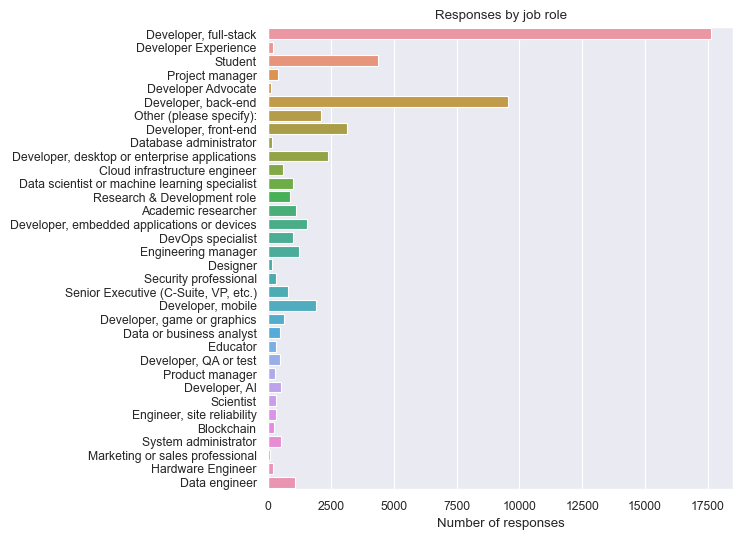

In [23]:
# Responses split by job roles
sns.countplot(df2, y='DevType').set(xlabel='Number of responses', ylabel='', title='Responses by job role') #stat='percent'

### Response by Age Band

<function matplotlib.pyplot.show(close=None, block=None)>

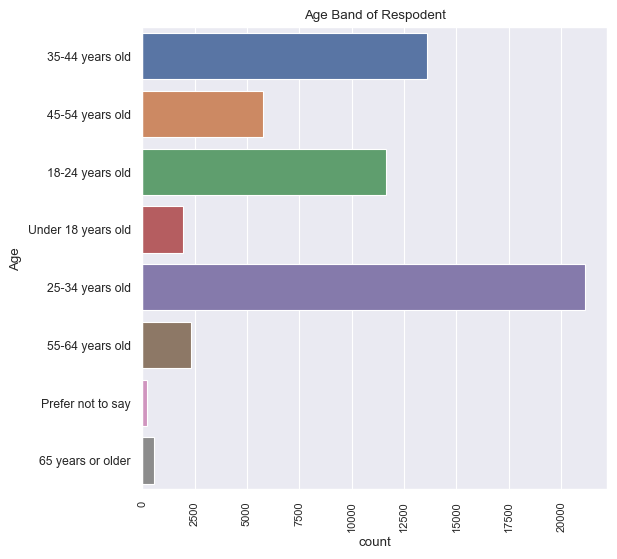

In [25]:
sns.countplot(df2, y = 'Age').set_title('Age Band of Respodent')
plt.xticks(fontsize=8, rotation=90)
plt.show

### Response by Country

<function matplotlib.pyplot.show(close=None, block=None)>

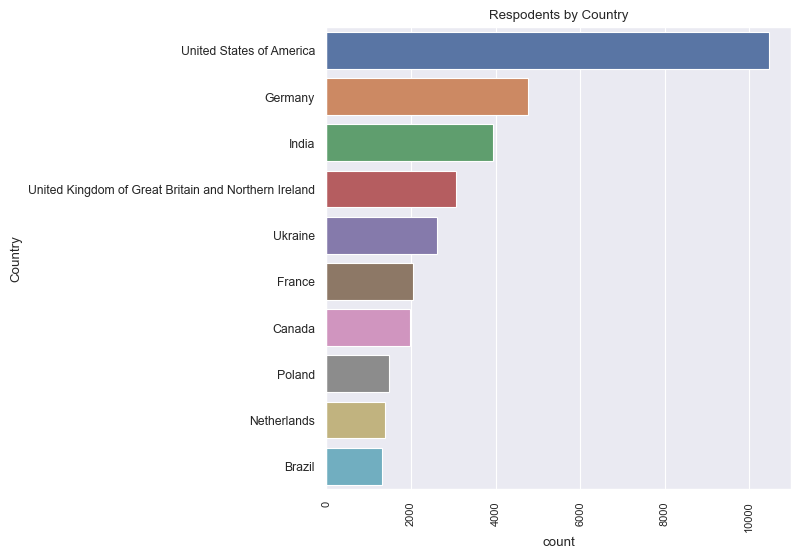

In [27]:
sns.countplot(df2, y = 'Country', order=pd.value_counts(df2['Country']).iloc[:10].index).set_title('Respodents by Country')
plt.xticks(fontsize=8, rotation=90)
plt.show


### Response by Employment Status 

<function matplotlib.pyplot.show(close=None, block=None)>

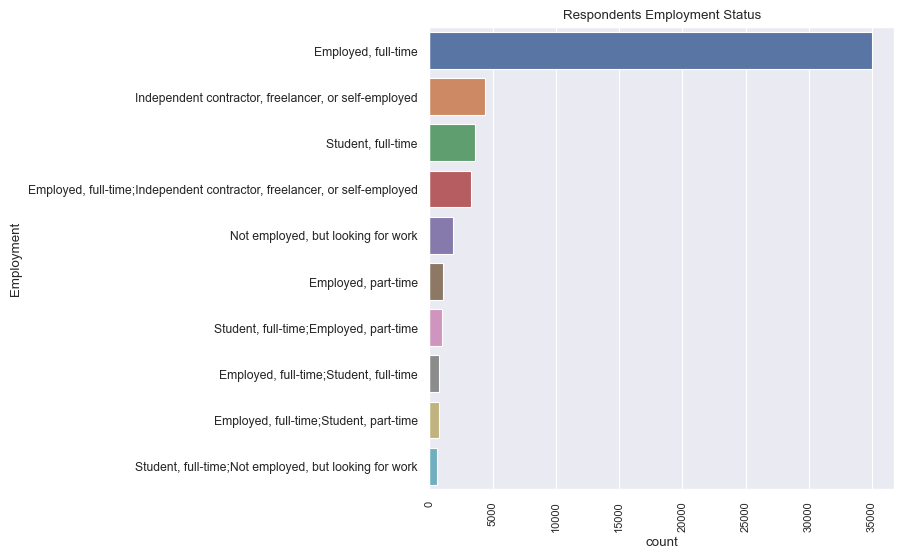

In [29]:
sns.countplot(df2, y = 'Employment', order=pd.value_counts(df2['Employment']).iloc[:10].index).set_title('Respondents Employment Status')
plt.xticks(fontsize=8, rotation=90)
plt.show


In [30]:
### Response by Eductaion Level 

<function matplotlib.pyplot.show(close=None, block=None)>

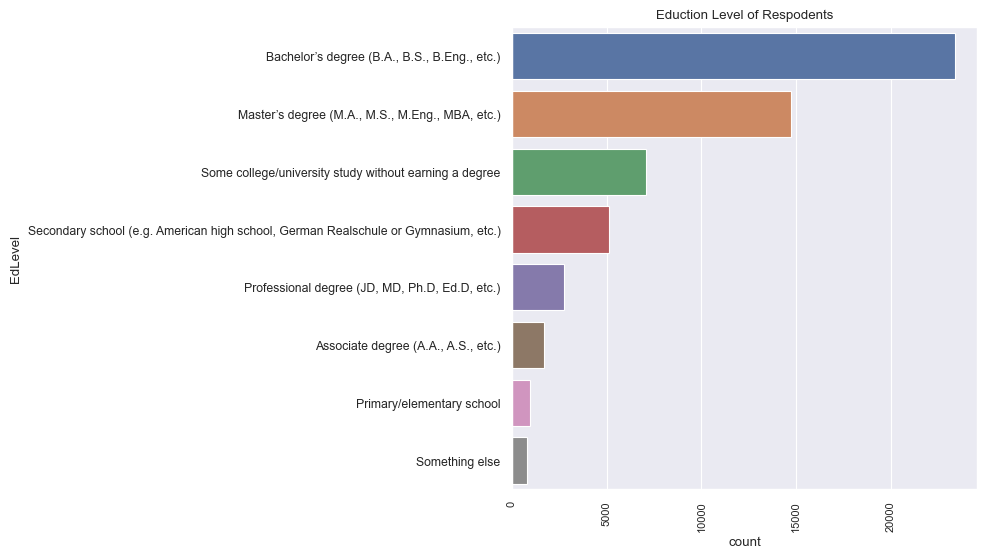

In [31]:
sns.countplot(data = df2, y = 'EdLevel', order=pd.value_counts(df2['EdLevel']).iloc[:10].index).set_title('Eduction Level of Respodents')
plt.xticks(fontsize=8, rotation=90)
plt.show

[Text(0, 0.5, ''),
 Text(0.5, 0, 'Annual Compensation in USD'),
 Text(0.5, 1.0, 'Mean annual compensation by job role')]

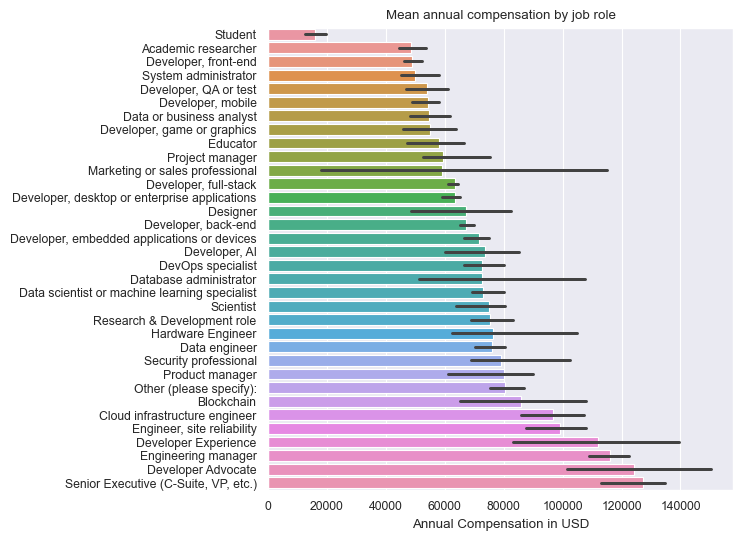

In [172]:
result = df2.groupby(["DevType"])['ConvertedCompYearly'].aggregate(np.median).reset_index().sort_values('ConvertedCompYearly')
sns.barplot(df, y='DevType', x='ConvertedCompYearly', estimator='median', 
            order=result['DevType']).set(ylabel = '', 
                                         xlabel = 'Annual Compensation in USD', 
                                         title = 'Median annual compensation by job role')

### UK Mean Compansation by developer Type 

[Text(0, 0.5, ''),
 Text(0.5, 0, 'Annual Compensation in USD'),
 Text(0.5, 1.0, 'Median annual compensation for job role in UK')]

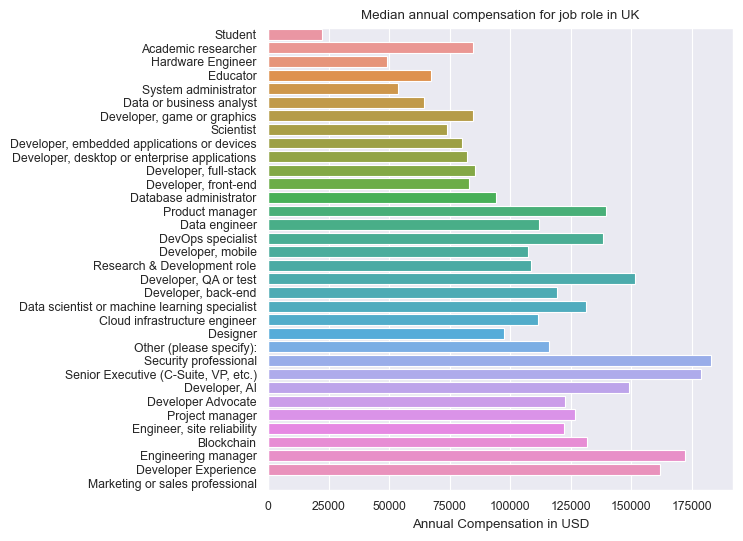

In [174]:
result = df2[df2.Country == "United Kingdom of Great Britain and Northern Ireland"].groupby(["DevType"])['ConvertedCompYearly'].aggregate(np.median).reset_index().sort_values('ConvertedCompYearly')
sns.barplot(df[df.Country == "United Kingdom of Great Britain and Northern Ireland"], 
            y='DevType', 
            x='ConvertedCompYearly', 
            estimator='mean', 
            order=result['DevType'],
            errorbar=None).set(ylabel = '', xlabel = 'Annual Compensation in USD', title = 'Median annual compensation for job role in UK')

# times 1.27 to find GBP

### Most popular programming languages for all respondents

In [37]:
df2['LanguageHaveWorkedWith'].unique()

array(['Bash/Shell (all shells);Go;HTML/CSS;Java;JavaScript;Python;TypeScript',
       'C#',
       'C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;Python;SQL;TypeScript',
       ...,
       'Bash/Shell (all shells);C;C#;C++;Delphi;Groovy;HTML/CSS;Java;JavaScript;Objective-C;PowerShell;Python;SQL;Swift;TypeScript',
       'C;C++;Go;Lua;Objective-C;Python;Rust;SQL',
       'C;HTML/CSS;Java;JavaScript;PHP;Python;TypeScript'], dtype=object)

In [38]:
languages_df = df2[['DevType', 'LanguageHaveWorkedWith']].copy()
languages_df





,DevType,LanguageHaveWorkedWith
1,"Developer, full-stack",Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...
2,Developer Experience,C#
3,"Developer, full-stack",C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...
4,"Developer, full-stack",C++;HTML/CSS;JavaScript;Lua;Python;Rust
5,Student,Bash/Shell (all shells);HTML/CSS;Java;JavaScri...
...,...,...
65414,NaN,C;HTML/CSS;Python;SQL
65421,NaN,Bash/Shell (all shells);Python
65431,"Developer, full-stack",Bash/Shell (all shells);C;C#;C++;Delphi;Groovy...
65435,"Developer, back-end",C;C++;Go;Lua;Objective-C;Python;Rust;SQL


In [39]:
languages = ['Assembly','Bash/Shell (all shells)','C','C#','C++','Dart','Delphi','Fortran','GDScript','Go','Groovy','Haskell','HTML/CSS','Java','JavaScript','Julia','Kotlin','Lisp',
'Lua','MATLAB','Objective-C','Perl','PHP','PowerShell','Python','R','Ruby','Rust','Scala','SQL','Swift','TypeScript','VBA','Visual Basic (.Net)']

In [40]:
languages_df = languages_df.join(
    languages_df['LanguageHaveWorkedWith'].str.get_dummies(sep=';')
    .reindex(languages, axis=1, fill_value=0).astype(bool))

In [41]:
languages_counts = dict.fromkeys(languages)

[Text(0.5, 1.0, 'Most popular programming languages for all respondents')]

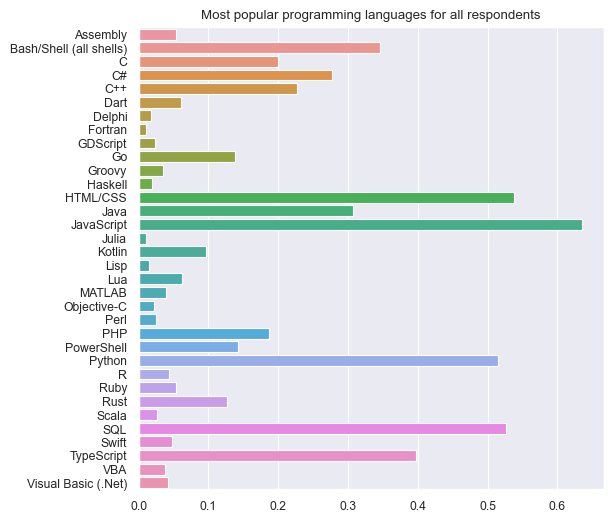

In [42]:
for language in languages:
    languages_counts[language] = languages_df[language].sum()/len(languages_df)

sns.barplot(y=list(languages_counts.keys()), x=list(languages_counts.values())).set(title="Most popular programming languages for all respondents")
    

### Language most wanted to work with for all respondents

In [44]:
df2['LanguageWantToWorkWith'].unique()

array(['Bash/Shell (all shells);Go;HTML/CSS;Java;JavaScript;Kotlin;Python;TypeScript',
       'C#', 'HTML/CSS;Java;JavaScript;PowerShell;Python;SQL;TypeScript',
       ..., 'Dart;Elixir;Go;Lua;Python;Ruby;SQL;Zig', 'Elixir;Rust;Swift',
       'Bash/Shell (all shells);C#;Go;HTML/CSS;Java;JavaScript;Kotlin;Objective-C;Python;Rust;SQL;Swift;TypeScript'],
      dtype=object)

In [45]:
language_want_df = df2[['DevType', 'LanguageWantToWorkWith']].copy()
language_want_df

,DevType,LanguageWantToWorkWith
1,"Developer, full-stack",Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...
2,Developer Experience,C#
3,"Developer, full-stack",HTML/CSS;Java;JavaScript;PowerShell;Python;SQL...
4,"Developer, full-stack",C++;HTML/CSS;JavaScript;Lua;Python
5,Student,Bash/Shell (all shells);HTML/CSS;Java;JavaScri...
...,...,...
65414,NaN,Rust
65421,NaN,Rust
65431,"Developer, full-stack",Bash/Shell (all shells);C#;Go;HTML/CSS;Java;Ja...
65435,"Developer, back-end",Rust;SQL


In [46]:
languages_want_df = language_want_df.join(
    language_want_df['LanguageWantToWorkWith'].str.get_dummies(sep=';')
    .reindex(languages, axis=1, fill_value=0).astype(bool))

In [47]:
languages_want_counts = dict.fromkeys(languages)

[Text(0.5, 1.0, 'Language most wanted to work with for all respondents ')]

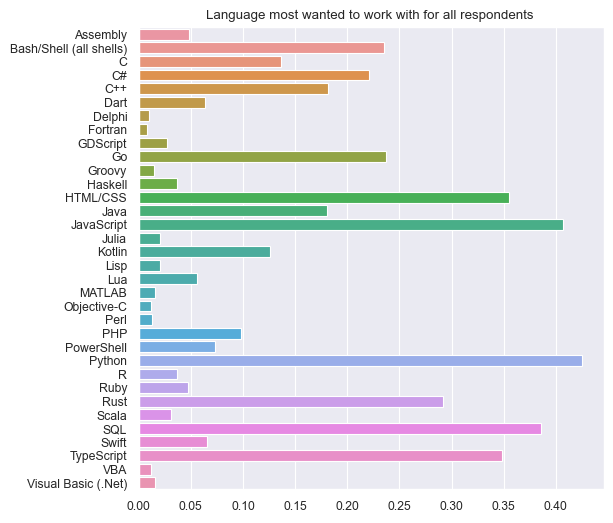

In [48]:
for language in languages:
    languages_want_counts[language] = languages_want_df[language].sum()/len(languages_df)

sns.barplot(y=list(languages_want_counts.keys()), x=list(languages_want_counts.values())).set(title="Language most wanted to work with for all respondents ")
    

### Database most worked with for all respondents

In [50]:
df2['DatabaseHaveWorkedWith'].unique()


array(['Dynamodb;MongoDB;PostgreSQL', 'Firebase Realtime Database',
       'MongoDB;MySQL;PostgreSQL;SQLite', ..., 'MySQL;Presto;Redis;TiDB',
       'Dynamodb;Elasticsearch;IBM DB2;MariaDB;MySQL;PostgreSQL',
       'Couch DB;H2;Microsoft SQL Server;MySQL;Oracle;PostgreSQL;SQLite'],
      dtype=object)

In [51]:
database_df = df2[['DevType', 'DatabaseHaveWorkedWith']].copy()
database_df

,DevType,DatabaseHaveWorkedWith
1,"Developer, full-stack",Dynamodb;MongoDB;PostgreSQL
2,Developer Experience,Firebase Realtime Database
3,"Developer, full-stack",MongoDB;MySQL;PostgreSQL;SQLite
4,"Developer, full-stack",PostgreSQL;SQLite
5,Student,Cloud Firestore
...,...,...
65414,NaN,MongoDB;MySQL;Redis
65421,NaN,PostgreSQL
65431,"Developer, full-stack",Couch DB;H2;Microsoft SQL Server;MySQL;Oracle;...
65435,"Developer, back-end",PostgreSQL;SQLite


In [52]:
databases = ['Dynamodb', 'MongoDB', 'PostgreSQL', 'Firebase Realtime Database', 'MySQL', 'SQLite', 'Presto', 'Redis', 'TiDB', 'Elasticsearch', 'IBM DB2', 'MariaDBMariaDB', 'Couch DB', 'H2', 'Microsoft SQL Server',
             'Oracle'] 


In [53]:
database_df = database_df.join(
    database_df['DatabaseHaveWorkedWith'].str.get_dummies(sep=';')
    .reindex(databases, axis=1, fill_value=0).astype(bool))

In [54]:
database_counts = dict.fromkeys(databases)

[Text(0.5, 1.0, 'Database most worked with for all respondents ')]

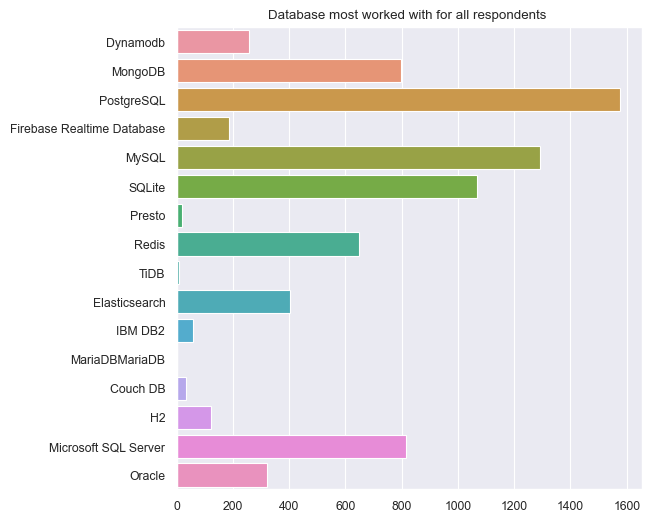

In [55]:
for database in databases:
    database_counts[database] = database_df[database].sum()/len(databases)

sns.barplot(y=list(database_counts.keys()), x=list(database_counts.values())).set(title="Database most worked with for all respondents ")
    

### Database most wanted to work with for all respondents

In [57]:
database_want_df = df2[['DevType', 'DatabaseWantToWorkWith']].copy()
database_want_df

,DevType,DatabaseWantToWorkWith
1,"Developer, full-stack",PostgreSQL
2,Developer Experience,Firebase Realtime Database
3,"Developer, full-stack",MongoDB;MySQL;PostgreSQL
4,"Developer, full-stack",PostgreSQL;SQLite
5,Student,Cloud Firestore
...,...,...
65414,NaN,Cassandra
65421,NaN,Dynamodb
65431,"Developer, full-stack",Elasticsearch;PostgreSQL;Redis
65435,"Developer, back-end",PostgreSQL;SQLite


In [58]:
database_want_df = database_want_df.join(
    database_want_df['DatabaseWantToWorkWith'].str.get_dummies(sep=';')
    .reindex(databases, axis=1, fill_value=0).astype(bool))

[Text(0.5, 1.0, 'Database most wanted to work with for all respondents')]

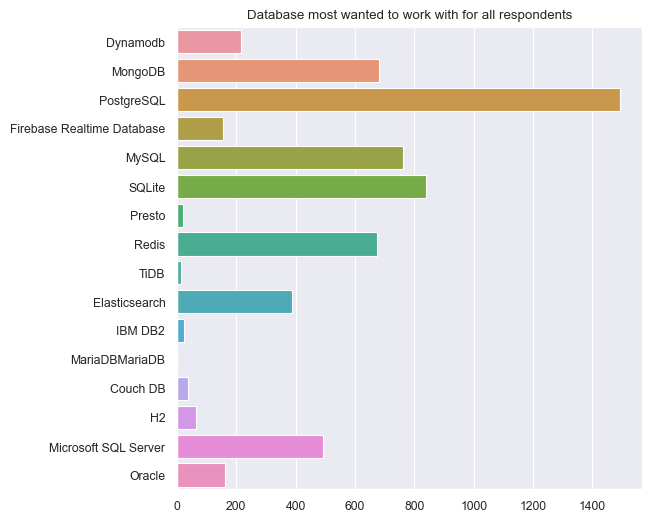

In [59]:
for database in databases:
    database_counts[database] = database_want_df[database].sum()/len(databases)

sns.barplot(y=list(database_counts.keys()), x=list(database_counts.values())).set(title="Database most wanted to work with for all respondents")

### Platform worked with

In [61]:
df2['PlatformHaveWorkedWith'].unique()

array(['Amazon Web Services (AWS);Heroku;Netlify', 'Google Cloud',
       'Amazon Web Services (AWS);Fly.io;Heroku', ...,
       'Amazon Web Services (AWS);Cloudflare;Digital Ocean;Google Cloud;Microsoft Azure;Netlify;PythonAnywhere;Render',
       'Alibaba Cloud;Amazon Web Services (AWS);Colocation;Databricks;Firebase;Fly.io;Google Cloud;Heroku;Managed Hosting;Microsoft Azure;Netlify;OpenStack;PythonAnywhere;Vercel;VMware',
       'Amazon Web Services (AWS);Google Cloud;Heroku;Linode, now Akamai;Vercel'],
      dtype=object)

In [62]:
program_df = df2[['DevType', 'PlatformHaveWorkedWith']].copy()
program_df

,DevType,PlatformHaveWorkedWith
1,"Developer, full-stack",Amazon Web Services (AWS);Heroku;Netlify
2,Developer Experience,Google Cloud
3,"Developer, full-stack",Amazon Web Services (AWS);Fly.io;Heroku
4,"Developer, full-stack",NaN
5,Student,Cloudflare
...,...,...
65414,NaN,Netlify;Vercel
65421,NaN,Amazon Web Services (AWS)
65431,"Developer, full-stack",Microsoft Azure
65435,"Developer, back-end",NaN


In [63]:
programs =['Amazon Web Services (AWS)', 'Heroku', 'Netlify', 'Google Cloud', 'Fly.io', 'Cloudflare', 'Digital Ocean', 'Microsoft Azure', 'PythonAnywhere', 'Render', 'Alibaba Cloud', 
'Colocation', 'Databricks', 'Firebase', 'Managed Hosting', 'Vercel', 'VMware', 'Linode', 'now Akamai'] 

In [64]:
program_df = program_df.join(
    program_df['PlatformHaveWorkedWith'].str.get_dummies(sep=';')
    .reindex(programs, axis=1, fill_value=0).astype(bool))

In [65]:
program_counts = dict.fromkeys(programs)

[Text(0.5, 1.0, 'Programs used by respondents')]

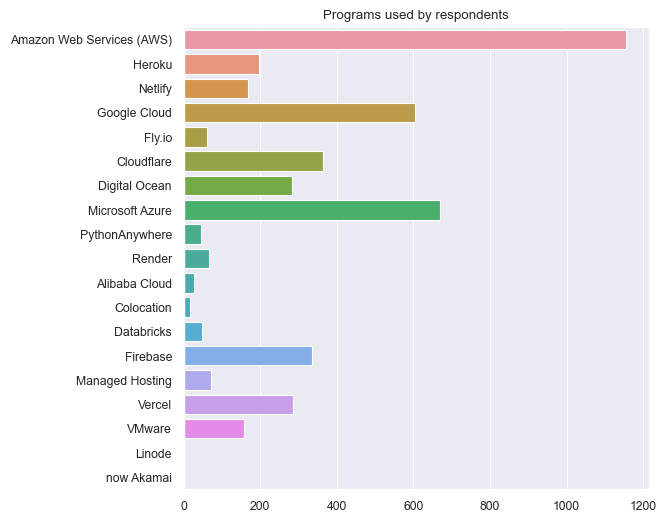

In [66]:
for program in programs:
    program_counts[program] = program_df[program].sum()/len(programs)

sns.barplot(y=list(program_counts.keys()), x=list(program_counts.values())).set(title="Platforms used by respondents")

### Platforms want to work with by respondents

In [68]:
df2['PlatformWantToWorkWith'].unique()

array(['Amazon Web Services (AWS);Heroku;Netlify', 'Google Cloud',
       'Amazon Web Services (AWS);Vercel', ...,
       'Amazon Web Services (AWS);Cloudflare;Firebase;Google Cloud;Heroku;Microsoft Azure;OVH;Vercel',
       'Amazon Web Services (AWS);Google Cloud;Heroku;Linode, now Akamai;Vercel',
       'PythonAnywhere;Render;Vercel'], dtype=object)

In [69]:
platform_df = df2[['DevType', 'PlatformWantToWorkWith']].copy()
platform_df

,DevType,PlatformWantToWorkWith
1,"Developer, full-stack",Amazon Web Services (AWS);Heroku;Netlify
2,Developer Experience,Google Cloud
3,"Developer, full-stack",Amazon Web Services (AWS);Vercel
4,"Developer, full-stack",NaN
5,Student,Cloudflare
...,...,...
65414,NaN,Amazon Web Services (AWS);Cloudflare
65421,NaN,Amazon Web Services (AWS)
65431,"Developer, full-stack",Amazon Web Services (AWS);Firebase;Microsoft A...
65435,"Developer, back-end",NaN


In [70]:
platform_df = platform_df.join(
    platform_df['PlatformWantToWorkWith'].str.get_dummies(sep=';')
    .reindex(programs, axis=1, fill_value=0).astype(bool))

In [71]:
programs =['Amazon Web Services (AWS)', 'Heroku', 'Netlify', 'Google Cloud', 'Fly.io', 'Cloudflare', 'Digital Ocean', 'Microsoft Azure', 'PythonAnywhere', 'Render', 'Alibaba Cloud', 
'Colocation', 'Databricks', 'Firebase', 'Managed Hosting', 'Vercel', 'VMware', 'Linode', 'now Akamai'] 

In [72]:
platform_counts = dict.fromkeys(programs)

[Text(0.5, 1.0, 'Programs respondents want to use')]

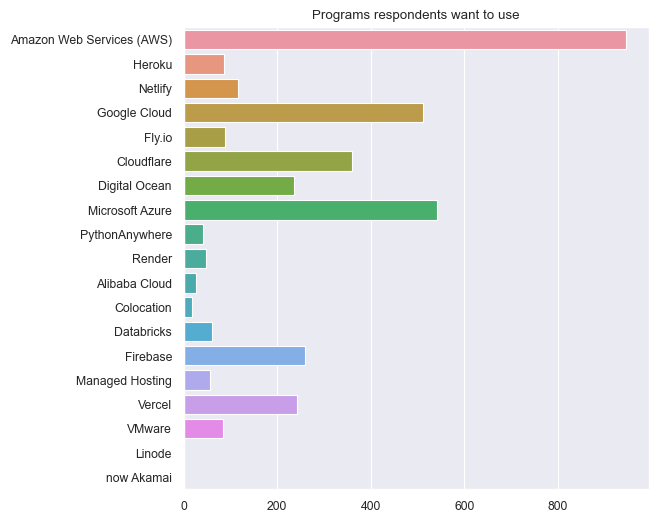

In [73]:
for platform in programs:
    platform_counts[platform] = platform_df[platform].sum()/len(programs)

sns.barplot(y=list(platform_counts.keys()), x=list(platform_counts.values())).set(title="Programs respondents want to use")

### AI have worked with 

In [75]:
df2['AISearchDevHaveWorkedWith'].unique()

array([nan, 'ChatGPT;GitHub Copilot;OpenAI Codex', 'ChatGPT', ...,
       'Amazon Q;Bing AI;ChatGPT;Cody;GitHub Copilot;Google Gemini;Lightning AI;Meta AI;OpenAI Codex;You.com',
       'ChatGPT;GitHub Copilot;Phind;Snyk Code',
       'Amazon Q;Codeium;Visual Studio Intellicode;You.com'], dtype=object)

In [76]:
ai_df = df2[['DevType', 'AISearchDevHaveWorkedWith']].copy()
ai_df

,DevType,AISearchDevHaveWorkedWith
1,"Developer, full-stack",NaN
2,Developer Experience,NaN
3,"Developer, full-stack",NaN
4,"Developer, full-stack",NaN
5,Student,ChatGPT;GitHub Copilot;OpenAI Codex
...,...,...
65414,NaN,Bing AI;ChatGPT;GitHub Copilot;Google Gemini;V...
65421,NaN,ChatGPT
65431,"Developer, full-stack",NaN
65435,"Developer, back-end",NaN


In [77]:
ais = ['ChatGPT', 'GitHub Copilot', 'OpenAI Codex', 'Amazon Q', 'Bing AI', 'Cody', 'Google Gemini', 'Lightning AI', 'Meta AI', 'You.com', 'Phind', 'Snyk Code', 'Codeium', 'Visual Studio Intellicode'] 

In [78]:
ai_df = ai_df.join(
    ai_df['AISearchDevHaveWorkedWith'].str.get_dummies(sep=';')
    .reindex(ais, axis=1, fill_value=0).astype(bool))

In [79]:
ai_counts = dict.fromkeys(ais)

[Text(0.5, 1.0, 'Ai services respondents use')]

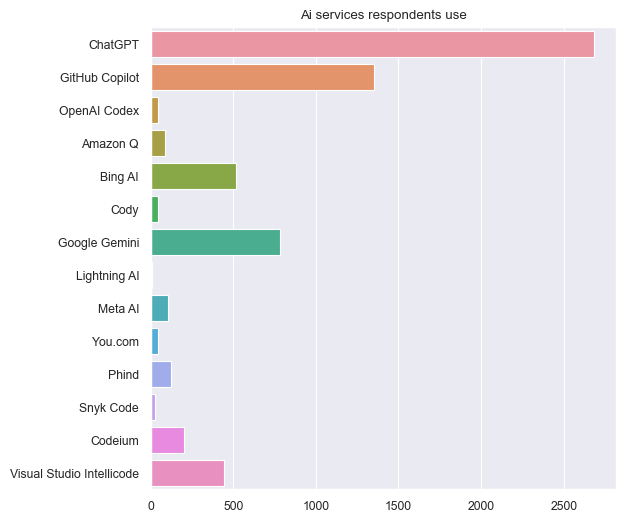

In [80]:
for ai in ais:
    ai_counts[ai] = ai_df[ai].sum()/len(ais)

sns.barplot(y=list(ai_counts.keys()), x=list(ai_counts.values())).set(title="Ai services respondents use")

### Ai want to work with 

In [82]:
df2['AISearchDevWantToWorkWith'].unique()

array([nan, 'ChatGPT;GitHub Copilot', 'ChatGPT', ...,
       'Amazon Q;Bing AI;ChatGPT;Cody;GitHub Copilot;Google Gemini;Lightning AI;Meta AI;OpenAI Codex;You.com',
       'Amazon Q;Codeium;Visual Studio Intellicode;You.com',
       'Bing AI;ChatGPT;Claude;GitHub Copilot;Google Gemini;Perplexity AI;WolframAlpha;Whispr AI'],
      dtype=object)

In [83]:
ai_want_df = df2[['DevType', 'AISearchDevWantToWorkWith']].copy()
ai_want_df

,DevType,AISearchDevWantToWorkWith
1,"Developer, full-stack",NaN
2,Developer Experience,NaN
3,"Developer, full-stack",NaN
4,"Developer, full-stack",NaN
5,Student,ChatGPT;GitHub Copilot
...,...,...
65414,NaN,NaN
65421,NaN,ChatGPT
65431,"Developer, full-stack",NaN
65435,"Developer, back-end",NaN


In [84]:
ai_want_df = ai_want_df.join(
    ai_want_df['AISearchDevWantToWorkWith'].str.get_dummies(sep=';')
    .reindex(ais, axis=1, fill_value=0).astype(bool))

[Text(0.5, 1.0, 'Ai services respondents use')]

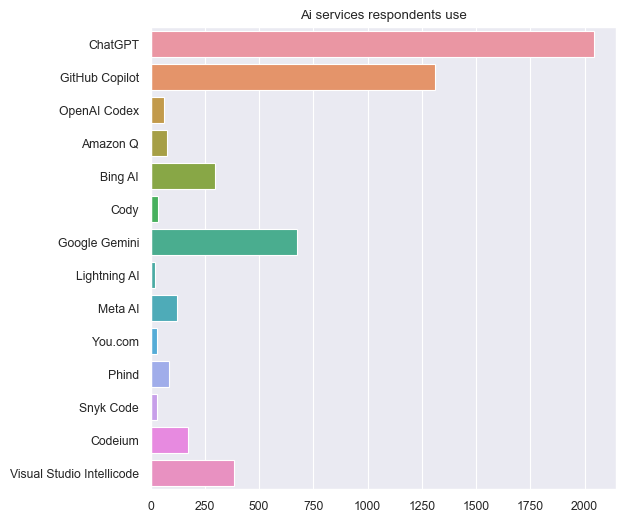

In [85]:
for ai in ais:
    ai_counts[ai] = ai_want_df[ai].sum()/len(ais)

sns.barplot(y=list(ai_counts.keys()), x=list(ai_counts.values())).set(title="Ai services respondents use")

## Analysis Results 

1.	The most represented demographic for the survey is:
•	Age band: 24-34
•	Country – USA
•	Employment Type – Full time
•	Education – Bachelor’s Degree.

2.	Internationally, the highest annual compensation rates were tagged with job titles such as: 
•	Senior Executive (C-Suite, VP)
•	Hardware Engineer
•	Developer Advocate

3.	Within the UK, the highest annual compensation was awarded to jobs tagged with:
•	Security Professional
•	Senior Executive (C-Suite, VP)
•	Engineering Manager

4.	The most popular programme languages returned by respondents were:
•	JavaScript
•	Python
•	SQL
•	HTML/CSS

5.	The following languages are making significant gains:
•	Rust
•	Go
•	Kotlin

6.	The most popular Databases used by respondents were:
•	PostgreSQL
•	MySQL
•	SQL Lite

7.	The following databases are increasing I popularity:
•	MongoDB
•	Redis

8.	The most popular platforms used by respondents were:
•	AWS
•	Microsoft Azure
•	Google Could

9.	Emerging platforms that respondents want to use:
•	Cloudfare
•	Digital Ocean
•	Firebase


10.	The most popular Ai technologies used by respondents were:
•	ChatGPT
•	Github Co-pilot
•	Google Gemini
